In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import scipy as sp
import pandas as pd 
import matplotlib as mpl
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import plotly.express as px
import scipy.stats as stats

In [2]:
df= pd.read_csv("/content/drive/MyDrive/veri/data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126426 entries, 0 to 126425
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Id                                  126426 non-null  int64  
 1   Elevation                           126397 non-null  float64
 2   Aspect                              126409 non-null  float64
 3   Slope                               126419 non-null  float64
 4   Horizontal_Distance_To_Hydrology    126413 non-null  float64
 5   Vertical_Distance_To_Hydrology      126419 non-null  float64
 6   Horizontal_Distance_To_Roadways     126419 non-null  float64
 7   Hillshade_9am                       126417 non-null  float64
 8   Hillshade_Noon                      126417 non-null  float64
 9   Hillshade_3pm                       126407 non-null  float64
 10  Horizontal_Distance_To_Fire_Points  126416 non-null  float64
 11  Wilderness_Area1          

In [4]:
df.dtypes

Id                                      int64
Elevation                             float64
Aspect                                float64
Slope                                 float64
Horizontal_Distance_To_Hydrology      float64
Vertical_Distance_To_Hydrology        float64
Horizontal_Distance_To_Roadways       float64
Hillshade_9am                         float64
Hillshade_Noon                        float64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points    float64
Wilderness_Area1                        int64
Wilderness_Area2                        int64
Wilderness_Area3                        int64
Wilderness_Area4                        int64
Soil_Type1                              int64
Soil_Type2                              int64
Soil_Type3                              int64
Soil_Type4                              int64
Soil_Type5                              int64
Soil_Type6                              int64
Soil_Type7                        

In [5]:
df.shape #gözlem,değişken

(126426, 56)

In [6]:
df.describe() #istatiksel değerler

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,126426.000000,126397.000000,126409.00000,126419.000000,126413.000000,126419.000000,126419.000000,126417.000000,126417.000000,126407.000000,126416.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.0,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.0,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000,126426.000000
mean,63213.500000,2923.748641,153.88205,14.741257,273.843719,53.668808,1977.291238,211.490013,222.442172,144.440751,1532.003837,0.218919,0.011097,0.635961,0.139331,0.010995,0.033031,0.009057,0.029670,0.012711,0.018058,0.0,0.002840,0.009239,0.074399,0.025984,0.012711,0.025651,0.009302,0.0,0.014135,0.005869,0.010939,0.012798,0.016120,0.011089,0.027787,0.046628,0.026221,0.003385,0.013012,0.011074,0.010030,0.049705,0.016484,0.041226,0.065786,0.065445,0.012822,0.021135,0.012458,0.014570,0.053565,0.076654,0.047443,3.350229
std,36496.186904,393.059379,109.36078,7.873904,223.151516,65.299742,1274.615185,28.432655,20.246966,38.490670,1061.190395,0.413515,0.104758,0.481162,0.346292,0.104277,0.178719,0.094735,0.169675,0.112025,0.133162,0.0,0.053212,0.095673,0.262421,0.159087,0.112025,0.158094,0.095997,0.0,0.118047,0.076385,0.104017,0.112402,0.125938,0.104722,0.164363,0.210842,0.159792,0.058086,0.113324,0.104648,0.099645,0.217336,0.127328,0.198813,0.247908,0.247311,0.112505,0.143835,0.110918,0.119823,0.225158,0.266042,0.212585,2.245249
min,1.000000,1795.000000,-27.00000,-2.000000,-47.000000,-298.000000,-240.000000,4.000000,69.000000,-45.000000,-260.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,31607.250000,2582.000000,62.00000,9.000000,115.000000,7.000000,1020.000000,198.000000,212.000000,120.000000,775.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,63213.500000,2960.000000,125.00000,14.000000,216.000000,35.000000,1758.000000,217.000000,224.000000,144.000000,1338.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [7]:
df['Aspect'].mode()

0    0.0
dtype: float64

In [8]:
df['Aspect'].median()

125.0

In [9]:
df['Aspect'].std()

109.3607796946565

In [10]:
df['Elevation'].mode()

0    3397.0
dtype: float64

In [11]:
df['Elevation'].median()

2960.0

In [12]:
df['Elevation'].std()

393.059378503932

In [13]:
df.cov() #kovaryans hesabı

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.331972e+09,-1.385970e+06,-30864.358693,35165.789550,-251141.501623,-6754.525022,-1.063604e+07,-40348.869199,-57772.960075,-45095.282365,-7.987034e+06,-7024.651853,3.158761e+02,3774.151014,3115.243437,2.435080e+02,679.736286,1.658071e+02,613.112537,171.563215,367.535128,0.0,8.287020e+00,34.914542,2058.080182,310.063955,28.007589,262.895990,1.617837e+02,0.0,6.427463e+01,2.071546e+02,90.002780,12.684342,6.157830e+01,5.572028e+01,-1.671696e+02,-671.069587,25.257263,2.900857e+01,41.684948,6.288776e+01,78.019862,-1748.788808,-2.225346e+02,-199.185375,-729.643381,-559.629353,119.397742,425.943880,216.658553,308.370101,1579.958110,2621.647352,1313.648527,76128.178762
Elevation,-1.385970e+06,1.544957e+05,985.133446,-523.780673,9749.973182,-73.735320,2.488390e+05,422.412065,815.734639,1252.478315,1.534188e+05,37.680995,2.764333e+00,46.384686,-86.840500,-5.642452e+00,-11.506850,-4.986520e+00,-5.753245,-1.808539,-11.091127,0.0,8.407891e-02,0.567475,-40.095325,-0.629874,0.173771,2.276201,-4.198662e-01,0.0,7.030260e-01,-1.614470e+00,0.633474,1.212077,1.348542e+00,8.764846e-01,4.360502e+00,8.498438,3.546354,4.935012e-01,0.928759,8.956189e-01,0.818623,5.120932,9.522519e-01,6.390051,17.373141,12.586658,1.295622,4.493428,2.306866,2.841878,19.278238,25.185432,15.557681,88.799125
Aspect,-3.086436e+04,9.851334e+02,11959.780135,6.417441,-53.110054,27.283369,4.568993e+03,-280.855715,123.025595,543.780597,-5.453380e+00,-0.707574,-4.686820e-02,1.147556,-0.410556,-2.128416e-03,-0.083703,-1.221358e-01,0.037650,-0.030089,-0.002150,0.0,-1.115163e-02,0.021697,-0.406039,-0.072643,0.019614,0.135668,4.231306e-02,0.0,4.897457e-02,2.482057e-02,-0.028178,0.023629,-6.661646e-02,-2.022525e-02,-1.001965e-01,0.013372,0.136589,-8.872201e-03,0.039523,-3.950596e-02,-0.036085,-0.028297,-1.103436e-01,-0.026654,0.071894,0.069987,0.055955,0.005887,0.102610,-0.091970,0.123598,0.040504,0.032731,0.226818
Slope,3.516579e+04,-5.237807e+02,6.417441,61.998359,-48.685075,16.434593,-1.061902e+03,-12.281758,-19.904174,-23.426031,-6.706115e+02,-0.245276,-7.150753e-03,-0.197036,0.450124,2.374387e-02,0.036344,4.155469e-02,0.027398,0.004191,0.004609,0.0,8.850690e-04,0.001481,0.166960,-0.009366,-0.003656,-0.003403,-5.683711e-06,0.0,-3.279807e-03,9.349832e-03,-0.001156,0.006768,-3.699491e-03,-1.639345e-03,-1.765805e-02,-0.136750,-0.002868,-2.161544e-03,0.001136,-3.834582e-03,0.000821,0.045381,-5.258587e-03,-0.056111,-0.152241,0.136069,0.000776,-0.002196,0.001127,0.003493,-0.044201,0.005932,-0.010191,1.481475
Horizontal_Distance_To_Hydrology,-2.511415e+05,9.749973e+03,-53.110054,-48.685075,49796.598903,536.853494,7.884261e+03,10.115310,45.521896,184.345552,1.021332e+04,0.067940,1.104900e-01,8.942405,-9.121556,-4.305111e-01,-0.386295,-5.361284e-01,-0.210303,0.051064,-0.847817,0.0,-1.983115e-02,0.096269,-6.278654,-0.179133,-0.016326,-0.002154,-1.183528e-01,0.0,-7.003864e-02,-3.498563e-01,-0.059384,-0.088521,1.121136e-01,-9.146199e-02,2.655749e-01,0.928379,0.059876,-3.021162e-02,0.200559,4.714579e-02,0.005308,-0.327177,-1.577656e-01,0.212339,0.708110,0.201983,0.029114,0.033395,-0.067461,0.070641,0.833933,1.267938,0.764296,-19.178487
Vertical_Distance_To_Hydrology,-6.754525e+03,-7.373532e+01,27.283369,16.434593,536.853494,4264.056308,-1.681871e+03,-2.0

In [14]:
df.corr() #korelasyon hesabı 

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.000000,-0.096615,-0.007733,0.122371,-0.030836,-0.002834,-0.228640,-0.038883,-0.078184,-0.032101,-0.206224,-0.465464,0.082619,0.214922,0.246491,0.063985,0.104213,0.047956,0.099009,0.041963,0.075626,NaN,0.004267,0.009999,0.214890,0.053403,0.006850,0.045564,0.046177,NaN,0.014919,0.074309,0.023708,0.003092,0.013397,0.014579,-0.027868,-0.087209,0.004331,0.013684,0.010079,0.016466,0.021454,-0.220475,-0.047888,-0.027451,-0.080644,-0.062003,0.029079,0.081141,0.053521,0.070515,0.192270,0.270008,0.169317,0.929038
Elevation,-0.096615,1.000000,0.022918,-0.169237,0.111152,-0.002873,0.496671,0.037804,0.102501,0.082787,0.367791,0.231822,0.067126,0.245253,-0.637970,-0.137795,-0.163825,-0.133900,-0.086256,-0.041068,-0.211880,NaN,0.004019,0.015089,-0.388680,-0.010073,0.003946,0.036637,-0.011126,NaN,0.015158,-0.053767,0.015492,0.027431,0.027240,0.021299,0.067488,0.102544,0.056466,0.021613,0.020848,0.021779,0.020899,0.059944,0.019025,0.081770,0.178312,0.129483,0.029295,0.079485,0.052924,0.060333,0.217808,0.240822,0.186169,0.100617
Aspect,-0.007733,0.022918,1.000000,0.007453,-0.002176,0.003821,0.032777,-0.090324,0.055559,0.129183,-0.000047,-0.015647,-0.004091,0.021808,-0.010841,-0.000187,-0.004283,-0.011788,0.002029,-0.002456,-0.000148,NaN,-0.001916,0.002074,-0.014148,-0.004176,0.001601,0.007846,0.004030,NaN,0.003793,0.002971,-0.002477,0.001922,-0.004839,-0.001766,-0.005574,0.000580,0.007817,-0.001397,0.003189,-0.003452,-0.003311,-0.001191,-0.007926,-0.001226,0.002652,0.002588,0.004548,0.000374,0.008459,-0.007018,0.005019,0.001392,0.001408,0.000924
Slope,0.122371,-0.169237,0.007453,1.000000,-0.027708,0.031965,-0.105810,-0.054859,-0.124856,-0.077295,-0.080254,-0.075331,-0.008669,-0.052007,0.165078,0.028917,0.025826,0.055707,0.020507,0.004751,0.004396,NaN,0.002112,0.001966,0.080800,-0.007477,-0.004145,-0.002734,-0.000008,NaN,-0.003529,0.015545,-0.001412,0.007647,-0.003731,-0.001988,-0.013646,-0.082370,-0.002279,-0.004726,0.001273,-0.004654,0.001047,0.026518,-0.005245,-0.035843,-0.077990,0.069878,0.000877,-0.001939,0.001291,0.003702,-0.024931,0.002832,-0.006089,0.083799
Horizontal_Distance_To_Hydrology,-0.030836,0.111152,-0.002176,-0.027708,1.000000,0.036841,0.027723,0.001594,0.010075,0.021462,0.043127,0.000736,0.004726,0.083285,-0.118034,-0.018500,-0.009686,-0.025359,-0.005554,0.002043,-0.028530,NaN,-0.001670,0.004509,-0.107218,-0.005046,-0.000653,-0.000061,-0.005525,NaN,-0.002659,-0.020524,-0.002558,-0.003529,0.003989,-0.003914,0.007241,0.019731,0.001679,-0.002331,0.007930,0.002019,0.000239,-0.006746,-0.005554,0.004787,0.012800,0.003660,0.001160,0.001040,-0.002725,0.002642,0.016598,0.021356,0.016112,-0.038277
Vertical_Distance_To_Hydrology,-0.002834,-0.002873,0.003821,0.031965,0.036841,1.000000,-0.020207,-0.001083,-0.011095,-0.007908,-0.022793,-0.049994,-0.010469,0.041452,0.005523,-0.001335,-0.005966,0.008551,0.006694,-0.000149,-0.003379,NaN,0.001980,0.001804,-0.047538,-0.003474,-0.001521,0.001776,-0.006032,NaN,-0.002666,-0.012381,-0.005196,-0.003194,-0.000729,0.000703,-0.012684,-0.062629,-0.004862,0.000231,0.002279,-0.000860,-0.004945,-0.015240,-0.007523,0.001904,-0.017158,0.013759,0.003870,-0.008483,-0.001693,-0.006530,-0.006839,0.007567,0.013596,-0.029241
Horizontal_Distance_To_Roadways,-0.228640,0.49667

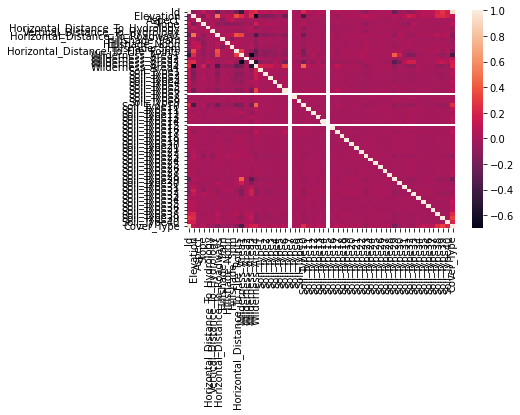

In [15]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [16]:
df= df.select_dtypes(include=['float64', 'int64'])
#df= df.dropna()
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,3317.0,131.0,20.0,232.0,21.0,1762.0,237.0,195.0,136.0,3412.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,3221.0,243.0,7.0,163.0,161.0,2153.0,196.0,222.0,131.0,1948.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,3,3156.0,305.0,12.0,183.0,5.0,2769.0,240.0,253.0,235.0,3060.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4,3157.0,135.0,10.0,68.0,55.0,1641.0,227.0,253.0,159.0,817.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,5,3209.0,292.0,2.0,430.0,39.0,460.0,223.0,246.0,125.0,1252.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [17]:
df.isnull().sum()

Id                                     0
Elevation                             29
Aspect                                17
Slope                                  7
Horizontal_Distance_To_Hydrology      13
Vertical_Distance_To_Hydrology         7
Horizontal_Distance_To_Roadways        7
Hillshade_9am                          9
Hillshade_Noon                         9
Hillshade_3pm                         19
Horizontal_Distance_To_Fire_Points    10
Wilderness_Area1                       0
Wilderness_Area2                       0
Wilderness_Area3                       0
Wilderness_Area4                       0
Soil_Type1                             0
Soil_Type2                             0
Soil_Type3                             0
Soil_Type4                             0
Soil_Type5                             0
Soil_Type6                             0
Soil_Type7                             0
Soil_Type8                             0
Soil_Type9                             0
Soil_Type10     

In [18]:
df.isnull().sum().sum()

127

In [19]:
missing_elevation = df.Elevation.isnull().sum()
missing_elevation

29

In [20]:
fig = px.box(df, y="Wilderness_Area1")
fig.show()

In [21]:
def diagnostic_plots(df, variable):
  plt.figure(figsize=(16, 4))
  plt.subplot(1, 3, 1)
  sns.histplot(df[variable], bins=30)
  plt.title('Histogram')

  plt.subplot(1, 3, 2)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.ylabel('Variable quantiles')

  plt.subplot(1, 3, 3)
  sns.boxplot(y=df[variable])
  plt.title('Boxplot')
  plt.show()

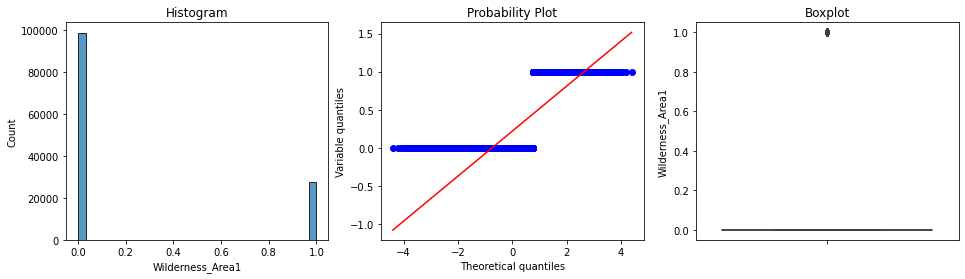

In [22]:
diagnostic_plots(df, 'Wilderness_Area1')

In [23]:
fig = px.box(df, y="Slope")
fig.show()

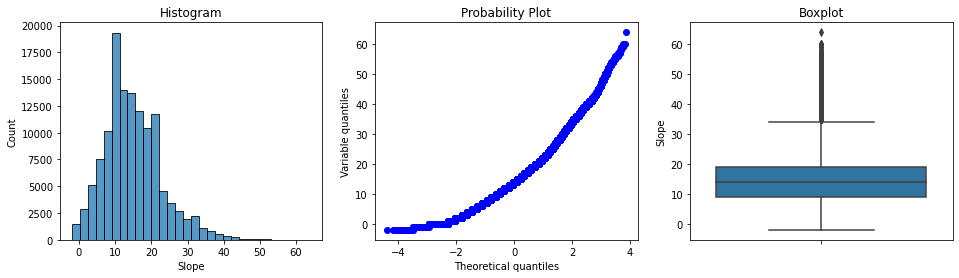

In [24]:
diagnostic_plots(df, 'Slope')

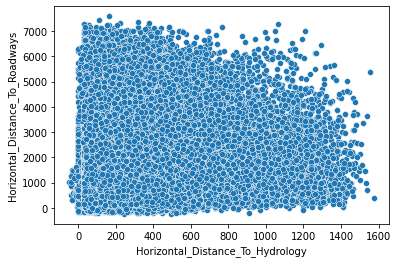

In [25]:
sns.scatterplot(x= 'Horizontal_Distance_To_Hydrology', y='Horizontal_Distance_To_Roadways', data=df)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



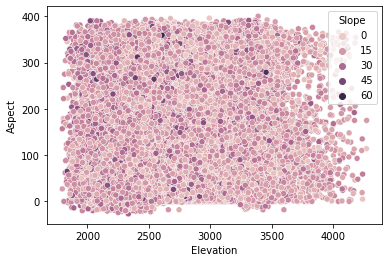

In [26]:
sns.scatterplot(x="Elevation", y="Aspect",hue="Slope", data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



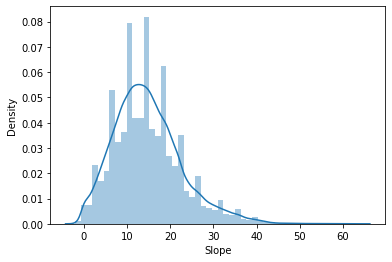

In [27]:
sns.distplot(df.Slope);

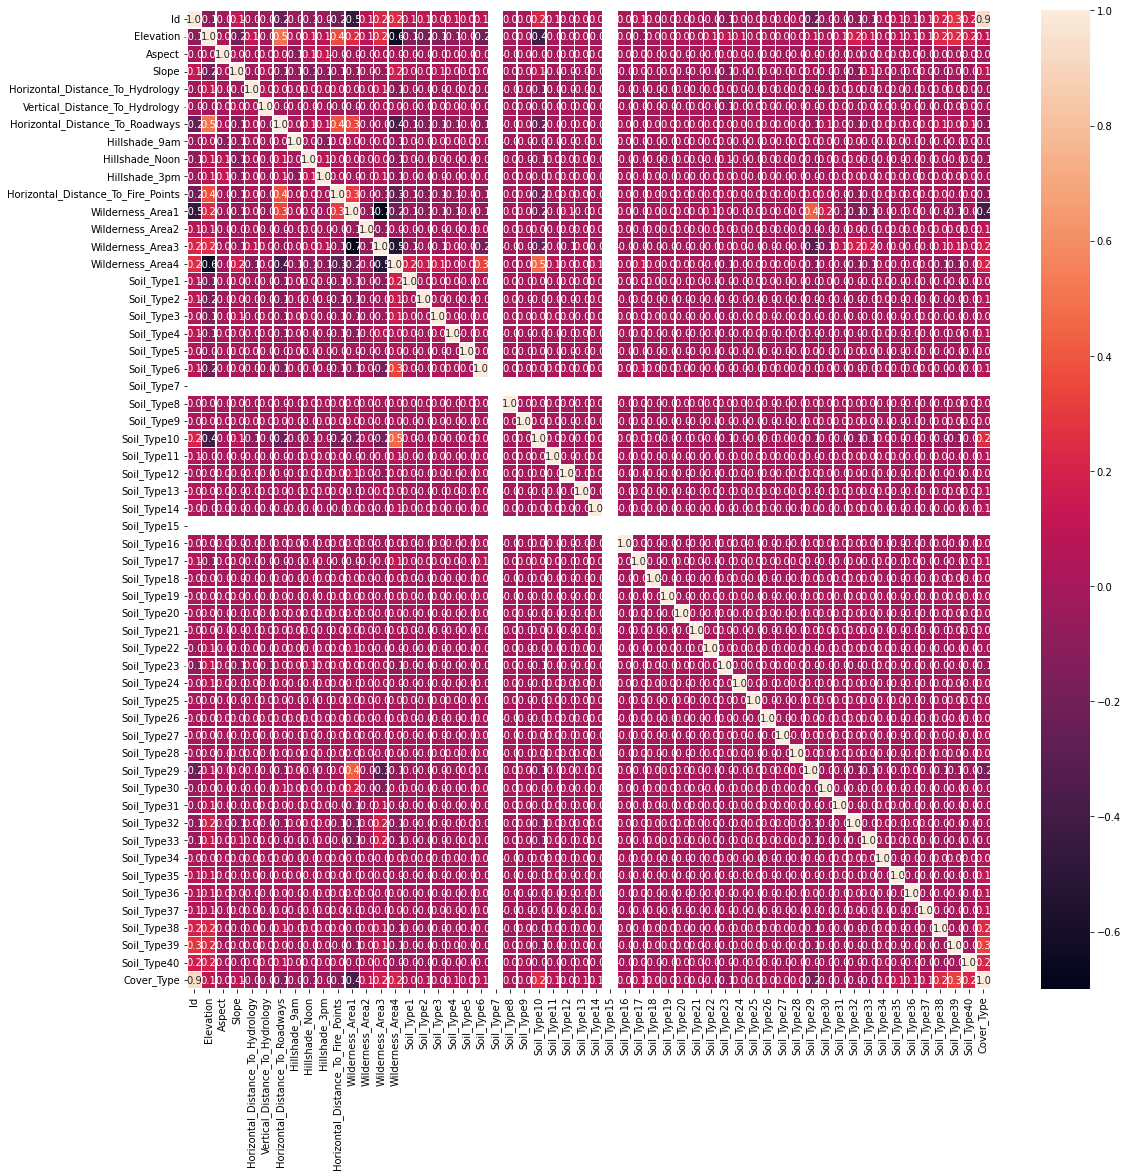

In [28]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [29]:
df1 = df.pivot("Aspect","Id","Soil_Type12");

In [30]:
df_elevation = df["Elevation"]
df_elevation.head()

0    3317.0
1    3221.0
2    3156.0
3    3157.0
4    3209.0
Name: Elevation, dtype: float64

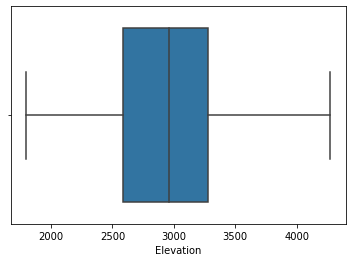

In [31]:
sns.boxplot(x=df_elevation);

In [32]:
Q1= df_elevation.quantile(0.25)
Q3= df_elevation.quantile(0.75)
IQR= Q3-Q1

In [33]:
Q1

2582.0

In [34]:
Q3

3274.0

In [35]:
IQR

692.0

In [36]:
alt_sinir=Q1-1.5*IQR
ust_sinir=Q3+1.5*IQR

In [37]:
alt_sinir

1544.0

In [38]:
ust_sinir

4312.0

In [39]:
aykiri_tf=(df_elevation<alt_sinir)
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: Elevation, dtype: bool

Eksik Veri İşlemleri

In [40]:
df.isnull()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126421,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
126422,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
126423,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
126424,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [41]:
missing_values_count = df.isnull().sum()
missing_values_count

Id                                     0
Elevation                             29
Aspect                                17
Slope                                  7
Horizontal_Distance_To_Hydrology      13
Vertical_Distance_To_Hydrology         7
Horizontal_Distance_To_Roadways        7
Hillshade_9am                          9
Hillshade_Noon                         9
Hillshade_3pm                         19
Horizontal_Distance_To_Fire_Points    10
Wilderness_Area1                       0
Wilderness_Area2                       0
Wilderness_Area3                       0
Wilderness_Area4                       0
Soil_Type1                             0
Soil_Type2                             0
Soil_Type3                             0
Soil_Type4                             0
Soil_Type5                             0
Soil_Type6                             0
Soil_Type7                             0
Soil_Type8                             0
Soil_Type9                             0
Soil_Type10     

In [42]:
df[df.isnull().any(axis=1)]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1627,1628,NaN,303.0,11.0,457.0,48.0,1407.0,223.0,216.0,248.0,357.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1628,1629,NaN,60.0,13.0,435.0,40.0,2296.0,157.0,231.0,164.0,1962.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1629,1630,NaN,59.0,6.0,232.0,324.0,2717.0,241.0,233.0,164.0,2758.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1651,1652,NaN,120.0,9.0,194.0,197.0,3409.0,220.0,219.0,174.0,327.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1654,1655,3228.0,59.0,0.0,NaN,19.0,2167.0,196.0,230.0,179.0,1851.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108005,108006,NaN,114.0,4.0,674.0,-6.0,2893.0,245.0,231.0,93.0,1932.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7
108013,108014,3330.0,347.0,21.0,NaN,6.0,2914.0,209.0,214.0,197.0,1229.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7
126232,126233,NaN,60.0,11.0,74.0,20.0,3074.0,241.0,179.0,215.0,1130.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7
126327,126328,NaN,379.0,7.0,598.0,21.0,1304.0,216.0,242.0,104.0,1133.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7


In [43]:
df[df.notnull().all(axis=1)]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,3317.0,131.0,20.0,232.0,21.0,1762.0,237.0,195.0,136.0,3412.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,3221.0,243.0,7.0,163.0,161.0,2153.0,196.0,222.0,131.0,1948.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,3,3156.0,305.0,12.0,183.0,5.0,2769.0,240.0,253.0,235.0,3060.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4,3157.0,135.0,10.0,68.0,55.0,1641.0,227.0,253.0,159.0,817.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,5,3209.0,292.0,2.0,430.0,39.0,460.0,223.0,246.0,125.0,1252.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126421,126422,3286.0,35.0,23.0,416.0,-3.0,942.0,241.0,229.0,148.0,1309.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7
126422,126423,3401.0,15.0,10.0,225.0,-5.0,1345.0,214.0,235.0,140.0,844.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7
126423,126424,3481.0,131.0,37.0,102.0,118.0,2074.0,252.0,165.0,100.0,776.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7
126424,126425,3482.0,50.0,17.0,127.0,43.0,1949.0,228.0,199.0,133.0,1475.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [44]:
#basit değer ataması 
df["Elevation"]

0         3317.0
1         3221.0
2         3156.0
3         3157.0
4         3209.0
           ...  
126421    3286.0
126422    3401.0
126423    3481.0
126424    3482.0
126425    3411.0
Name: Elevation, Length: 126426, dtype: float64

In [45]:
df["Elevation"].mean()
missing_elevation = df.Elevation.isnull().sum()
print("Elevation niteliğindeki eksik veri sayısı: "+ str( missing_elevation))
df.Elevation.fillna(df.Elevation.median(),inplace=True)
after_elevation = df.Elevation.isnull().sum()
print("Tamamlamadan sonra Elevation niteliğindeki eksik veri sayısı: "+ str( after_elevation))


Elevation niteliğindeki eksik veri sayısı: 29
Tamamlamadan sonra Elevation niteliğindeki eksik veri sayısı: 0


In [46]:
df["Aspect"].mean()
missing_aspect = df.Aspect.isnull().sum()
print("Aspect niteliğindeki eksik veri sayısı: "+ str( missing_aspect))
df.Aspect.fillna(df.Aspect.median(),inplace=True)
after_aspect = df.Aspect.isnull().sum()
print("Tamamlamadan sonra Aspect niteliğindeki eksik veri sayısı: "+ str( after_aspect))

Aspect niteliğindeki eksik veri sayısı: 17
Tamamlamadan sonra Aspect niteliğindeki eksik veri sayısı: 0


In [47]:
df["Slope"].mean()
missing_slope = df.Slope.isnull().sum()
print("Slope niteliğindeki eksik veri sayısı: "+ str( missing_slope))
df.Slope.fillna(df.Slope.median(),inplace=True)
after_slope = df.Slope.isnull().sum()
print("Tamamlamadan sonra Slope niteliğindeki eksik veri sayısı: "+ str( after_slope))

Slope niteliğindeki eksik veri sayısı: 7
Tamamlamadan sonra Slope niteliğindeki eksik veri sayısı: 0


In [48]:
df["Horizontal_Distance_To_Hydrology"].mean()
missing_horizontal = df.Horizontal_Distance_To_Hydrology.isnull().sum()
print("Horizontal Distance To Hydrology niteliğindeki eksik veri sayısı: "+ str( missing_horizontal))
df.Horizontal_Distance_To_Hydrology.fillna(df.Horizontal_Distance_To_Hydrology.median(),inplace=True)
after_horizontal = df.Horizontal_Distance_To_Hydrology.isnull().sum()
print("Tamamlamadan sonra Horizontal Distance To Hydrology niteliğindeki eksik veri sayısı: "+ str( after_horizontal))

Horizontal Distance To Hydrology niteliğindeki eksik veri sayısı: 13
Tamamlamadan sonra Horizontal Distance To Hydrology niteliğindeki eksik veri sayısı: 0


In [49]:
df["Vertical_Distance_To_Hydrology"].mean()
missing_vertical = df.Vertical_Distance_To_Hydrology.isnull().sum()
print("Vertical Distance To Hydrology niteliğindeki eksik veri sayısı: "+ str( missing_vertical))
df.Vertical_Distance_To_Hydrology.fillna(df.Vertical_Distance_To_Hydrology.median(),inplace=True)
after_vertical = df.Vertical_Distance_To_Hydrology.isnull().sum()
print("Tamamlamadan sonra Vertical Distance To Hydrology niteliğindeki eksik veri sayısı: "+ str( after_vertical))

Vertical Distance To Hydrology niteliğindeki eksik veri sayısı: 7
Tamamlamadan sonra Vertical Distance To Hydrology niteliğindeki eksik veri sayısı: 0


In [50]:
df["Horizontal_Distance_To_Roadways"].mean()
missing_roadways = df.Horizontal_Distance_To_Roadways.isnull().sum()
print("Horizontal Distance To Roadways niteliğindeki eksik veri sayısı: "+ str( missing_roadways))
df.Horizontal_Distance_To_Roadways.fillna(df.Horizontal_Distance_To_Roadways.median(),inplace=True)
after_roadways = df.Horizontal_Distance_To_Roadways.isnull().sum()
print("Tamamlamadan sonra Horizantal Distance To Roadways niteliğindeki eksik veri sayısı: "+ str( after_roadways))

Horizontal Distance To Roadways niteliğindeki eksik veri sayısı: 7
Tamamlamadan sonra Horizantal Distance To Roadways niteliğindeki eksik veri sayısı: 0


In [51]:
df["Hillshade_9am"].mean()
missing_9am = df.Hillshade_9am.isnull().sum()
print(" Hillshade_9am niteliğindeki eksik veri sayısı: "+ str( missing_9am))
df.Hillshade_9am.fillna(df.Hillshade_9am.median(),inplace=True)
after_9am = df.Hillshade_9am.isnull().sum()
print("Tamamlamadan sonra Hillshade_9am niteliğindeki eksik veri sayısı: "+ str( after_9am))

 Hillshade_9am niteliğindeki eksik veri sayısı: 9
Tamamlamadan sonra Hillshade_9am niteliğindeki eksik veri sayısı: 0


In [52]:
df["Hillshade_Noon"].mean()
missing_noon = df.Hillshade_Noon.isnull().sum()
print("Hillshade_Noon niteliğindeki eksik veri sayısı: "+ str( missing_noon))
df.Hillshade_Noon.fillna(df.Hillshade_Noon.median(),inplace=True)
after_noon= df.Hillshade_Noon.isnull().sum()
print("Tamamlamadan sonra Hillshade_Noon niteliğindeki eksik veri sayısı: "+ str( after_noon))

Hillshade_Noon niteliğindeki eksik veri sayısı: 9
Tamamlamadan sonra Hillshade_Noon niteliğindeki eksik veri sayısı: 0


In [53]:
df["Hillshade_3pm"].mean()
missing_3pm = df.Hillshade_3pm.isnull().sum()
print("Hillshade_3pm niteliğindeki eksik veri sayısı: "+ str( missing_3pm))
df.Hillshade_3pm.fillna(df.Hillshade_3pm.median(),inplace=True)
after_3pm= df.Hillshade_3pm.isnull().sum()
print("Tamamlamadan sonra Hillshade_3pm niteliğindeki eksik veri sayısı: "+ str( after_3pm))

Hillshade_3pm niteliğindeki eksik veri sayısı: 19
Tamamlamadan sonra Hillshade_3pm niteliğindeki eksik veri sayısı: 0


In [54]:
df["Horizontal_Distance_To_Fire_Points"].mean()
missing_points = df.Horizontal_Distance_To_Fire_Points.isnull().sum()
print("Horizontal_Distance_To_Fire_Points  niteliğindeki eksik veri sayısı: "+ str( missing_points))
df.Horizontal_Distance_To_Fire_Points.fillna(df.Horizontal_Distance_To_Fire_Points.median(),inplace=True)
after_points= df.Horizontal_Distance_To_Fire_Points.isnull().sum()
print("Tamamlamadan sonra Horizontal_Distance_To_Fire_Points  niteliğindeki eksik veri sayısı: "+ str( after_points))

Horizontal_Distance_To_Fire_Points  niteliğindeki eksik veri sayısı: 10
Tamamlamadan sonra Horizontal_Distance_To_Fire_Points  niteliğindeki eksik veri sayısı: 0


In [55]:
df["Wilderness_Area1"].mean()
missing_area1 = df.Wilderness_Area1.isnull().sum()
print("Wilderness_Area1 niteliğindeki eksik veri sayısı: "+ str( missing_area1))
df.Wilderness_Area1.fillna(df.Wilderness_Area1.median(),inplace=True)
after_area1= df.Wilderness_Area1.isnull().sum()
print("Tamamlamadan sonra Wilderness_Area1  niteliğindeki eksik veri sayısı: "+ str( after_area1))

Wilderness_Area1 niteliğindeki eksik veri sayısı: 0
Tamamlamadan sonra Wilderness_Area1  niteliğindeki eksik veri sayısı: 0


In [56]:
df["Wilderness_Area2"].mean()
missing_area2 = df.Wilderness_Area2.isnull().sum()
print("Wilderness_Area2 niteliğindeki eksik veri sayısı: "+ str( missing_area2))
df.Wilderness_Area2.fillna(df.Wilderness_Area2.median(),inplace=True)
after_area2= df.Wilderness_Area2.isnull().sum()
print("Tamamlamadan sonra Wilderness_Area2  niteliğindeki eksik veri sayısı: "+ str( after_area2))

Wilderness_Area2 niteliğindeki eksik veri sayısı: 0
Tamamlamadan sonra Wilderness_Area2  niteliğindeki eksik veri sayısı: 0


In [57]:
df["Wilderness_Area3"].mean()
missing_area3 = df.Wilderness_Area3.isnull().sum()
print("Wilderness_Area3 niteliğindeki eksik veri sayısı: "+ str( missing_area3))
df.Wilderness_Area3.fillna(df.Wilderness_Area3.median(),inplace=True)
after_area3= df.Wilderness_Area3.isnull().sum()
print("Tamamlamadan sonra Wilderness_Area3  niteliğindeki eksik veri sayısı: "+ str( after_area3))

Wilderness_Area3 niteliğindeki eksik veri sayısı: 0
Tamamlamadan sonra Wilderness_Area3  niteliğindeki eksik veri sayısı: 0


In [58]:
df[df.isnull().any(axis=1)]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [59]:
subset_df = df.loc[:, 'Elevation':'Cover_Type'].head()
subset_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3317.0,131.0,20.0,232.0,21.0,1762.0,237.0,195.0,136.0,3412.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,3221.0,243.0,7.0,163.0,161.0,2153.0,196.0,222.0,131.0,1948.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,3156.0,305.0,12.0,183.0,5.0,2769.0,240.0,253.0,235.0,3060.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,3157.0,135.0,10.0,68.0,55.0,1641.0,227.0,253.0,159.0,817.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,3209.0,292.0,2.0,430.0,39.0,460.0,223.0,246.0,125.0,1252.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [60]:
subset_df.fillna(0) #tüm nan değerler yerine sıfır yazıyoruz

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3317.0,131.0,20.0,232.0,21.0,1762.0,237.0,195.0,136.0,3412.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,3221.0,243.0,7.0,163.0,161.0,2153.0,196.0,222.0,131.0,1948.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,3156.0,305.0,12.0,183.0,5.0,2769.0,240.0,253.0,235.0,3060.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,3157.0,135.0,10.0,68.0,55.0,1641.0,227.0,253.0,159.0,817.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,3209.0,292.0,2.0,430.0,39.0,460.0,223.0,246.0,125.0,1252.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [61]:
#Aynı sütunlardaki tüm NaN değerlerini  sıfır(0) ile değiştiriyoruz 
subset_df.fillna(method = 'bfill', axis = 0).fillna("0")

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3317.0,131.0,20.0,232.0,21.0,1762.0,237.0,195.0,136.0,3412.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,3221.0,243.0,7.0,163.0,161.0,2153.0,196.0,222.0,131.0,1948.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,3156.0,305.0,12.0,183.0,5.0,2769.0,240.0,253.0,235.0,3060.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,3157.0,135.0,10.0,68.0,55.0,1641.0,227.0,253.0,159.0,817.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,3209.0,292.0,2.0,430.0,39.0,460.0,223.0,246.0,125.0,1252.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Aykırı Veri İşlemleri

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



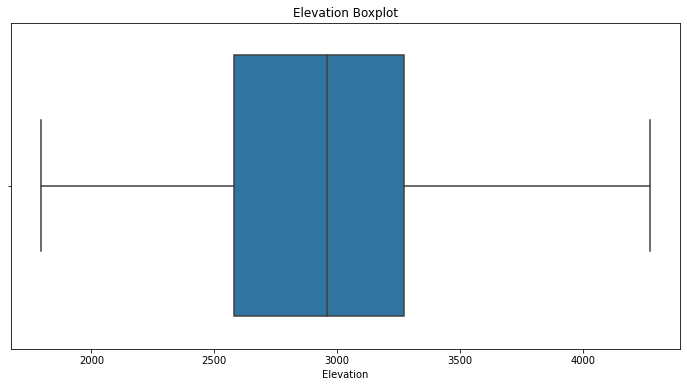

In [62]:
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Elevation).set_title('Elevation Boxplot')
fig.figure.savefig('boxplot_origin.png')

In [63]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df.Elevation)

,sub,values
0,IQR,692.0
1,Upper Bound,4312.0
2,Lower Bound,1544.0
3,Sum outliers,0.0
4,percentage outliers,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



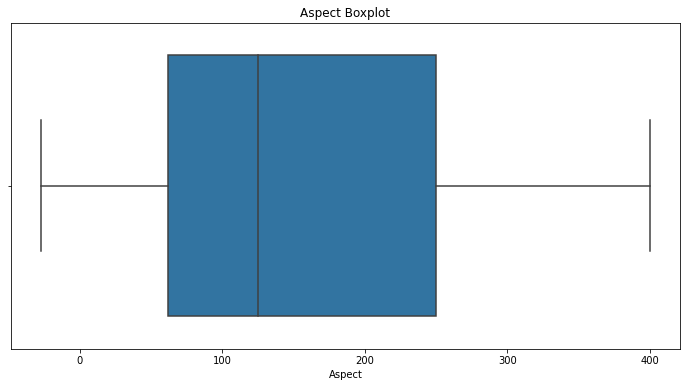

In [64]:
ig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Aspect).set_title('Aspect Boxplot')
fig.figure.savefig('boxplot_origin.png')

In [65]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df.Aspect)

,sub,values
0,IQR,188.0
1,Upper Bound,532.0
2,Lower Bound,-220.0
3,Sum outliers,0.0
4,percentage outliers,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



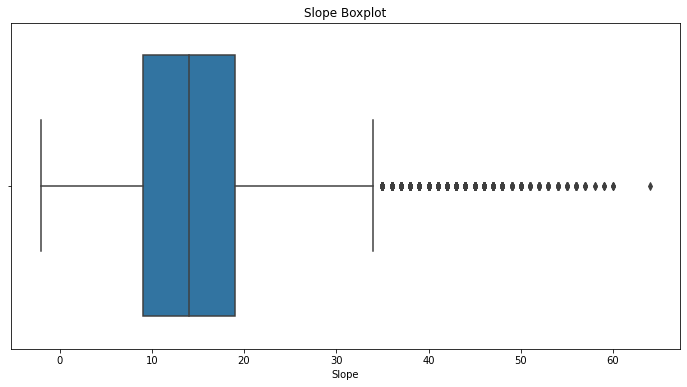

In [66]:
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Slope).set_title('Slope Boxplot')
fig.figure.savefig('boxplot_origin.png')

In [67]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df.Aspect)

,sub,values
0,IQR,188.0
1,Upper Bound,532.0
2,Lower Bound,-220.0
3,Sum outliers,0.0
4,percentage outliers,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



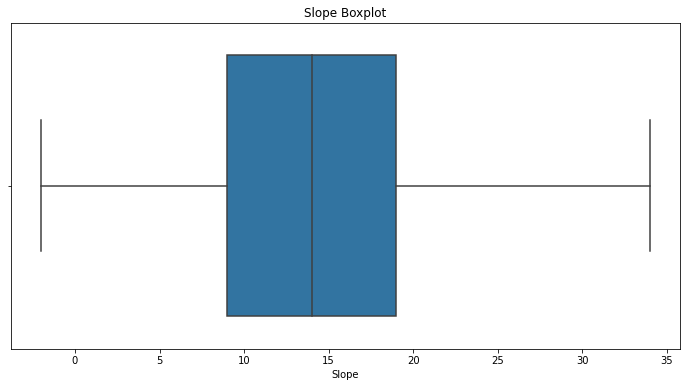

In [68]:
s = df['Slope']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
df['Slope'] = df.Slope.mask(df.Slope > upper_bound,df.Slope.median())
df['Slope'] = df.Slope.mask(df.Slope < lower_bound,df.Slope.median())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Slope).set_title('Slope Boxplot')
fig.figure.savefig('Slope_AD.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



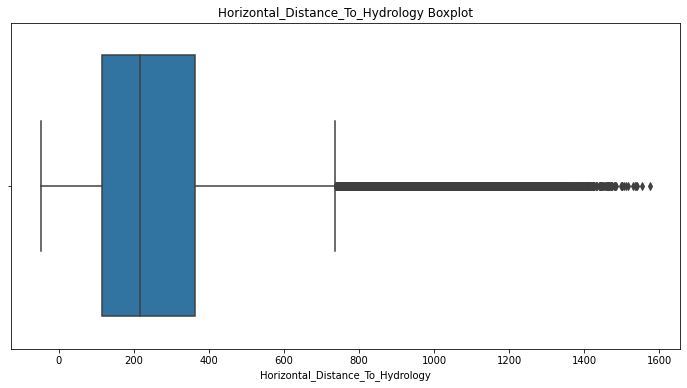

In [69]:
g,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Horizontal_Distance_To_Hydrology).set_title('Horizontal_Distance_To_Hydrology Boxplot')
fig.figure.savefig('boxplot_origin.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



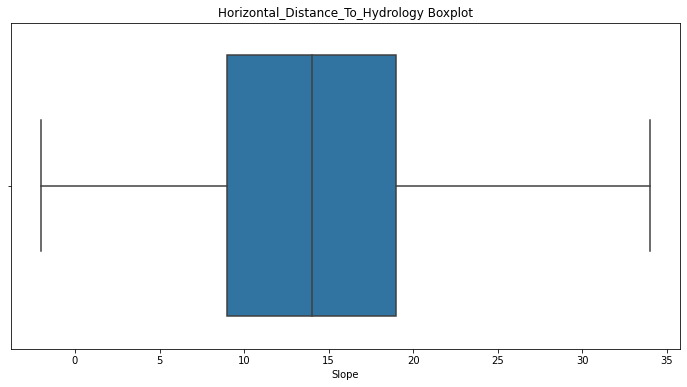

In [70]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df.Horizontal_Distance_To_Hydrology)

s = df['Horizontal_Distance_To_Hydrology']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
df['Horizontal_Distance_To_Hydrology'] = df.Horizontal_Distance_To_Hydrology.mask(df.Horizontal_Distance_To_Hydrology > upper_bound,df.Horizontal_Distance_To_Hydrology.median())
df['Horizontal_Distance_To_Hydrology'] = df.Horizontal_Distance_To_Hydrology.mask(df.Horizontal_Distance_To_Hydrology < lower_bound,df.Horizontal_Distance_To_Hydrology.median())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Slope).set_title('Horizontal_Distance_To_Hydrology Boxplot')
fig.figure.savefig('Horizontal_Distance_To_Hydrology.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



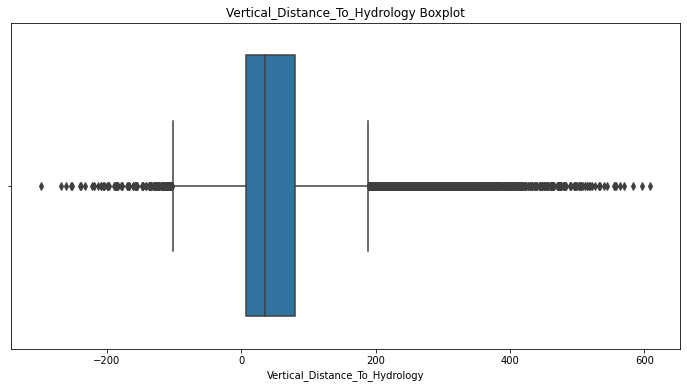

In [71]:
g,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Vertical_Distance_To_Hydrology).set_title('Vertical_Distance_To_Hydrology Boxplot')
fig.figure.savefig('boxplot_origin.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



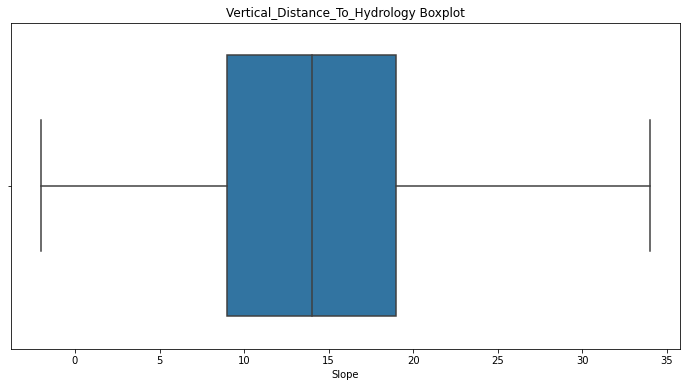

In [72]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df.Vertical_Distance_To_Hydrology)

s = df['Vertical_Distance_To_Hydrology']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
df['Vertical_Distance_To_Hydrology'] = df.Vertical_Distance_To_Hydrology.mask(df.Vertical_Distance_To_Hydrology > upper_bound,df.Vertical_Distance_To_Hydrology.median())
df['Vertical_Distance_To_Hydrology'] = df.Vertical_Distance_To_Hydrology.mask(df.Vertical_Distance_To_Hydrology < lower_bound,df.Vertical_Distance_To_Hydrology.median())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Slope).set_title('Vertical_Distance_To_Hydrology Boxplot')
fig.figure.savefig('Vertical_Distance_To_Hydrology.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



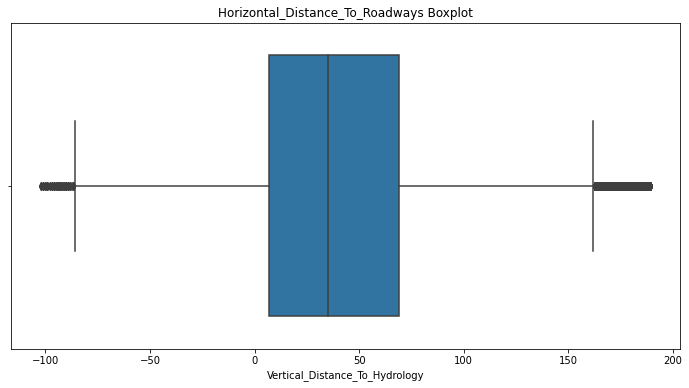

In [73]:
g,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Vertical_Distance_To_Hydrology).set_title('Horizontal_Distance_To_Roadways Boxplot')
fig.figure.savefig('boxplot_origin.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



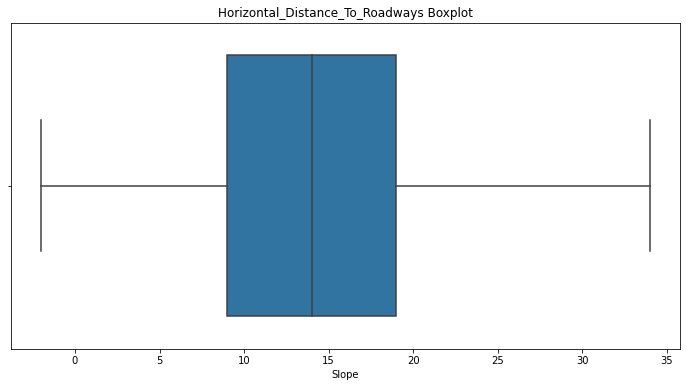

In [74]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df.Horizontal_Distance_To_Roadways)

s = df['Horizontal_Distance_To_Roadways']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
df['Horizontal_Distance_To_Roadways'] = df.Horizontal_Distance_To_Roadways.mask(df.Horizontal_Distance_To_Roadways > upper_bound,df.Horizontal_Distance_To_Roadways.median())
df['Horizontal_Distance_To_Roadways'] = df.Horizontal_Distance_To_Roadways.mask(df.Horizontal_Distance_To_Roadways < lower_bound,df.Horizontal_Distance_To_Roadways.median())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Slope).set_title('Horizontal_Distance_To_Roadways Boxplot')
fig.figure.savefig('Horizontal_Distance_To_Roadways.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



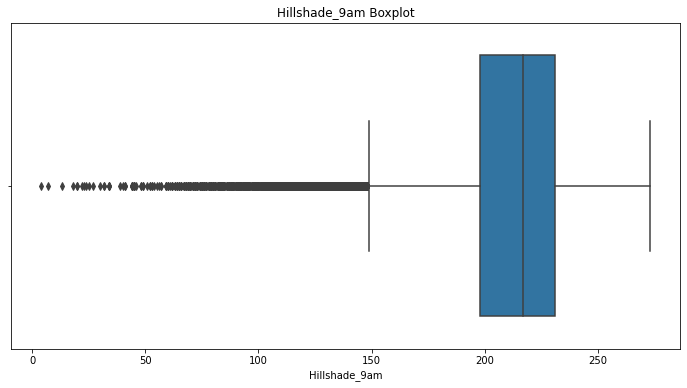

In [75]:
g,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Hillshade_9am).set_title('Hillshade_9am Boxplot')
fig.figure.savefig('boxplot_origin.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



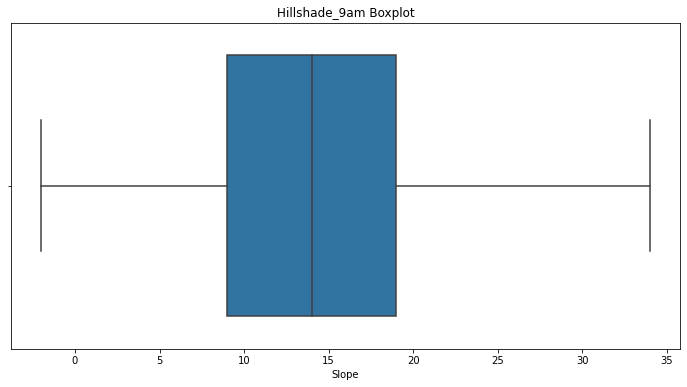

In [76]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df.Hillshade_9am)

s = df['Hillshade_9am']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
df['Hillshade_9am'] = df.Hillshade_9am.mask(df.Hillshade_9am > upper_bound,df.Hillshade_9am.median())
df['Hillshade_9am'] = df.Hillshade_9am.mask(df.Hillshade_9am < lower_bound,df.Hillshade_9am.median())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Slope).set_title('Hillshade_9am Boxplot')
fig.figure.savefig('Hillshade_9am.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



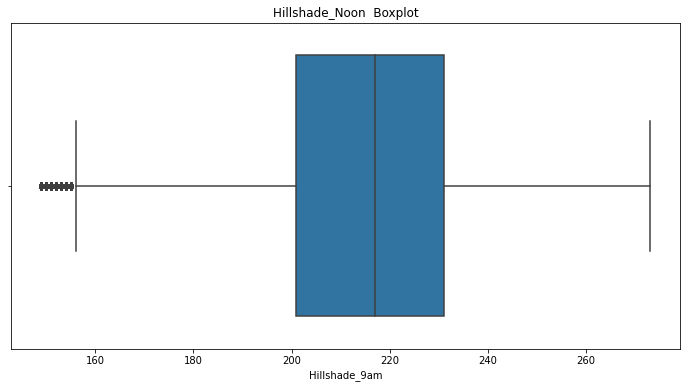

In [77]:
g,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Hillshade_9am).set_title('Hillshade_Noon  Boxplot')
fig.figure.savefig('boxplot_origin.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



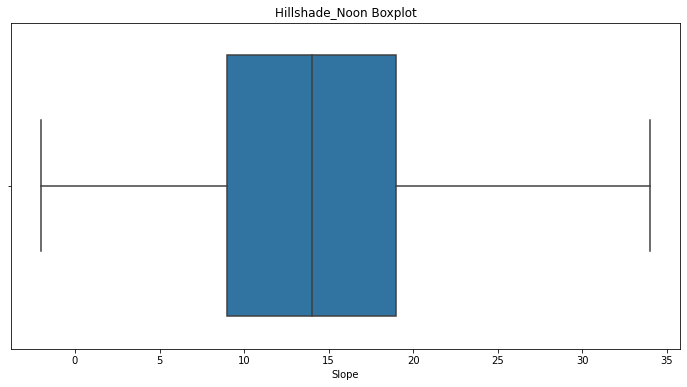

In [78]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df.Hillshade_Noon)

s = df['Hillshade_Noon']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
df['Hillshade_Noon'] = df.Hillshade_Noon.mask(df.Hillshade_Noon  > upper_bound,df.Hillshade_Noon.median())
df['Hillshade_Noon'] = df.Hillshade_9am.mask(df.Hillshade_Noon  < lower_bound,df.Hillshade_Noon.median())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Slope).set_title('Hillshade_Noon Boxplot')
fig.figure.savefig('Hillshade_Noon.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



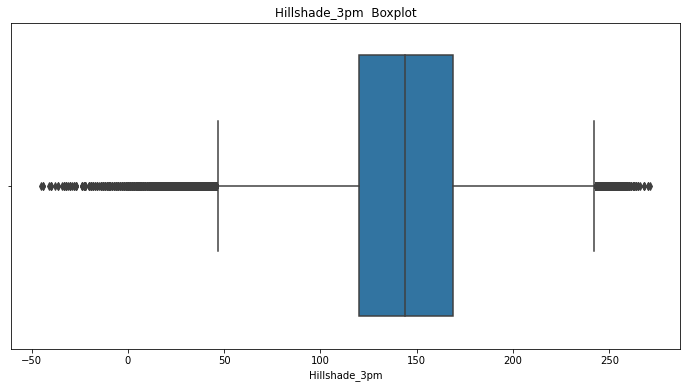

In [79]:
g,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Hillshade_3pm).set_title('Hillshade_3pm  Boxplot')
fig.figure.savefig('boxplot_origin.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



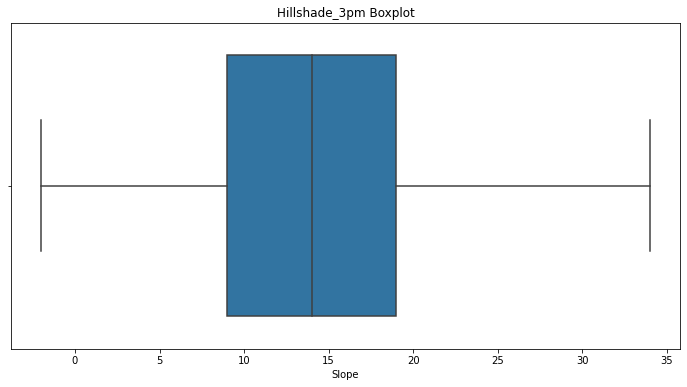

In [80]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df.Hillshade_3pm)

s = df['Hillshade_3pm']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
df['Hillshade_3pm'] = df.Hillshade_3pm.mask(df.Hillshade_3pm  > upper_bound,df.Hillshade_3pm.median())
df['Hillshade_3pm'] = df.Hillshade_9am.mask(df.Hillshade_3pm < lower_bound,df.Hillshade_3pm.median())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Slope).set_title('Hillshade_3pm Boxplot')
fig.figure.savefig('Hillshade_3pm.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



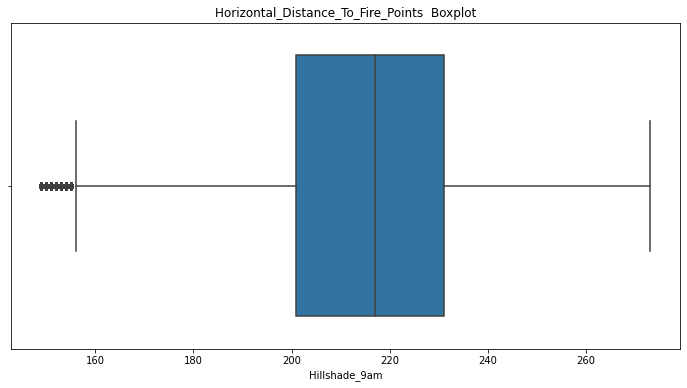

In [81]:
g,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Hillshade_9am).set_title('Horizontal_Distance_To_Fire_Points  Boxplot')
fig.figure.savefig('boxplot_origin.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



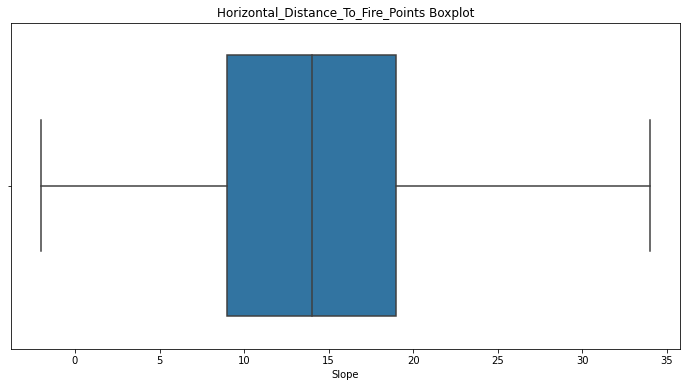

In [82]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df.Horizontal_Distance_To_Fire_Points)

s = df['Horizontal_Distance_To_Fire_Points']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
df['Horizontal_Distance_To_Fire_Points'] = df.Horizontal_Distance_To_Fire_Points.mask(df.Horizontal_Distance_To_Fire_Points  > upper_bound,df.Horizontal_Distance_To_Fire_Points.median())
df['Horizontal_Distance_To_Fire_Points'] = df.Horizontal_Distance_To_Fire_Points.mask(df.Horizontal_Distance_To_Fire_Points  < lower_bound,df.Horizontal_Distance_To_Fire_Points.median())
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.boxplot(df.Slope).set_title('Horizontal_Distance_To_Fire_Points Boxplot')
fig.figure.savefig('Horizontal_Distance_To_Fire_Points.png')